# Notebook Purpose: Produce basic statistical analysis of 5Y SP500 returns & VIX relationship
Notebook author: Philippe Heitzmann

In [149]:
import pandas as pd

df = pd.read_csv('SP500_VIX_Time_Series_Raw_Data.csv')
df.head()

,Date,SP500,SP500_%_Daily_Return,VIX
0,2017-09-25,2496.66,NaN,10.21
1,2017-09-26,2496.84,0.007%,10.17
2,2017-09-27,2507.04,0.409%,9.87
3,2017-09-28,2510.06,0.120%,9.55
4,2017-09-29,2519.36,0.371%,9.51


### Imputing missing values

In [150]:
df = df.interpolate()
df['SP500_Pct_Daily_Return'] = df['SP500'].pct_change() * 100
df['VIX_Pct_Daily_Change'] = df['VIX'].pct_change() * 100 
df['SP500_Pct_Daily_Return'].fillna(0)
df['VIX_Pct_Daily_Change'].fillna(0)
df.shape
# df.drop('SP500_%_Daily_Return ', axis = 1, inplace = True)

(1305, 6)

### Creating additional variables

In [151]:
df['30D_MVA']= df['SP500_Pct_Daily_Return'].rolling(30).mean()
df['50D_MVA']= df['SP500_Pct_Daily_Return'].rolling(50).mean()
df['100D_MVA']= df['SP500_Pct_Daily_Return'].rolling(100).mean()
df['200D_MVA']= df['SP500_Pct_Daily_Return'].rolling(200).mean()
df['VIX_30D_MVA']= df['VIX'].rolling(30).mean()
df['VIX_50D_MVA']= df['VIX'].rolling(50).mean()
df['VIX_100D_MVA']= df['VIX'].rolling(100).mean()
df['VIX_200D_MVA']= df['VIX'].rolling(200).mean()
df.head()

,Date,SP500,SP500_%_Daily_Return,VIX,SP500_Pct_Daily_Return,VIX_Pct_Daily_Change,30D_MVA,50D_MVA,100D_MVA,200D_MVA,VIX_30D_MVA,VIX_50D_MVA,VIX_100D_MVA,VIX_200D_MVA
0,2017-09-25,2496.66,NaN,10.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-09-26,2496.84,0.007%,10.17,0.007210,-0.391773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-09-27,2507.04,0.409%,9.87,0.408516,-2.949853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-09-28,2510.06,0.120%,9.55,0.120461,-3.242148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-09-29,2519.36,0.371%,9.51,0.370509,-0.418848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Looking at days with >2% gains / drops 

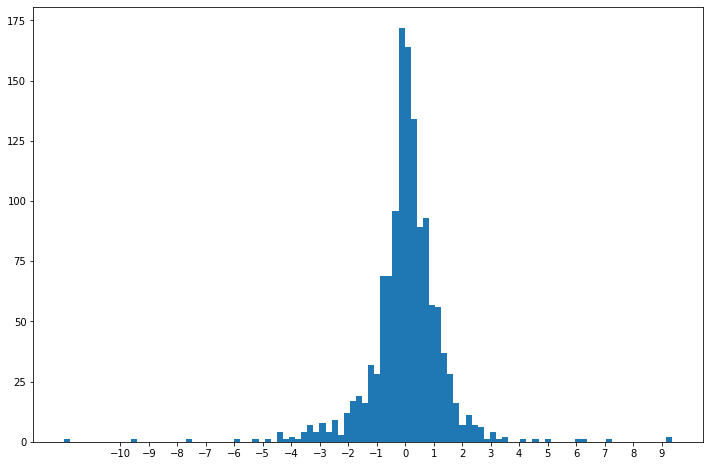

In [32]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,8))
plt.xticks(np.arange(-10, 10, step=1))
n, bins, patches = plt.hist(df['SP500_Pct_Daily_Return'], bins = 100)

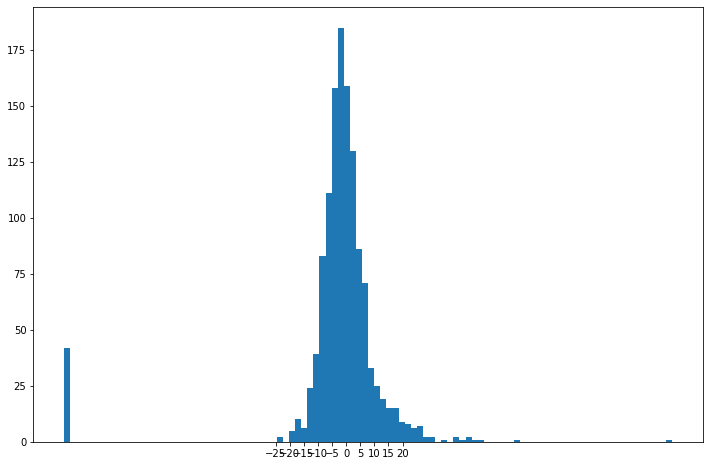

In [91]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,8))
plt.xticks(np.arange(-25, 25, step=5))
n, bins, patches = plt.hist(df['VIX_Pct_Daily_Change'].loc[np.isfinite(df['VIX_Pct_Daily_Change'])], bins = 100)

In [184]:
# Getting idx's of positive & negative return days
neg_0D_idxs = list([i for i in np.where(df['SP500_Pct_Daily_Return'] <= -1.5)][0])[:-1] #leave out last observation given last market day was >1.5% loss day and therefore no following day data
neg_0D = df.loc[df.index.isin(neg_0D_idxs)]
neg_1D_idxs = list([i+1 for i in np.where(df['SP500_Pct_Daily_Return'] <= -1.5)][0])
neg_1D = df.loc[df.index.isin(neg_1D_idxs)]

pos_0D_idxs = list([i for i in np.where(df['SP500_Pct_Daily_Return'] >= 1.5)][0])
pos_0D = df.loc[df.index.isin(pos_0D_idxs)]
pos_1D_idxs = list([i+1 for i in np.where(df['SP500_Pct_Daily_Return'] >= 1.5)][0])
pos_1D = df.loc[df.index.isin(pos_1D_idxs)]

### Days following negative returns 

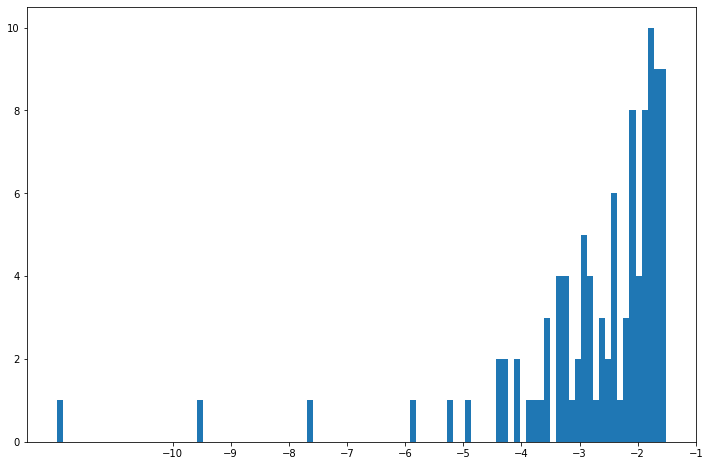

In [155]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,8))
plt.xticks(np.arange(-10, 10, step=1))
n, bins, patches = plt.hist(neg_0D['SP500_Pct_Daily_Return'], bins = 100)

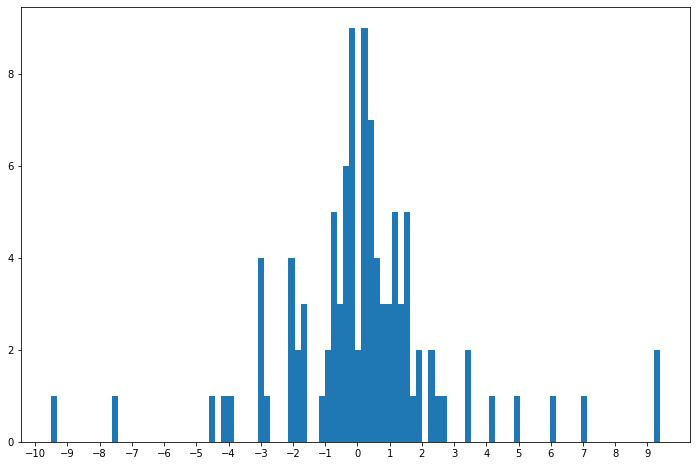

In [156]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,8))
plt.xticks(np.arange(-10, 10, step=1))
n, bins, patches = plt.hist(neg_1D['SP500_Pct_Daily_Return'], bins = 100)

### Days following positive returns 

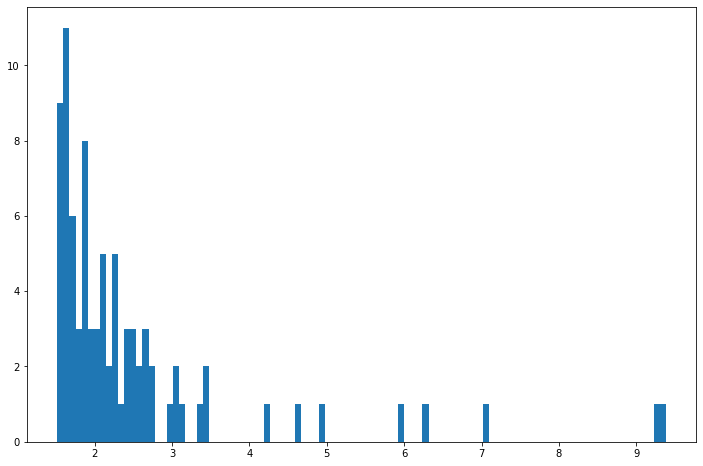

In [157]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,8))
plt.xticks(np.arange(-10, 10, step=1))
n, bins, patches = plt.hist(pos_0D['SP500_Pct_Daily_Return'], bins = 100)

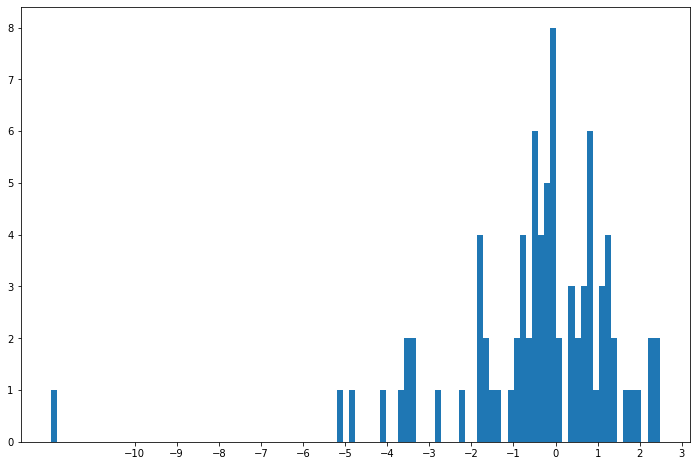

In [158]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,8))
plt.xticks(np.arange(-10, 10, step=1))
n, bins, patches = plt.hist(pos_1D['SP500_Pct_Daily_Return'], bins = 100)

In [169]:
!pip install statsmodels

     |████████████████████████████████| 9.9 MB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 40 kB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 9.8 MB/s eta 0:00:01
  Attempting uninstall: packaging
    Found existing installation: packaging 21.0
    Uninstalling packaging-21.0:
      Successfully uninstalled packaging-21.0


In [171]:
import statsmodels.api as sm

x_pos = np.array(pos_0D['SP500_Pct_Daily_Return']).reshape(-1, 1)
y_pos = np.array(pos_1D['SP500_Pct_Daily_Return']).reshape(-1, 1)
X2 = sm.add_constant(x_pos)
est = sm.OLS(y_pos, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     30.53
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           3.79e-07
Time:                        02:12:13   Log-Likelihood:                -165.74
No. Observations:                  84   AIC:                             335.5
Df Residuals:                      82   BIC:                             340.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3259      0.377      3.518      0.0

In [188]:
import statsmodels.api as sm

x_neg = np.array(neg_0D['SP500_Pct_Daily_Return']).reshape(-1, 1)
y_neg = np.array(neg_1D['SP500_Pct_Daily_Return']).reshape(-1, 1)
X2 = sm.add_constant(x_neg)
est = sm.OLS(y_neg, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     13.28
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           0.000430
Time:                        02:21:12   Log-Likelihood:                -232.36
No. Observations:                 101   AIC:                             468.7
Df Residuals:                      99   BIC:                             473.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3694      0.494     -2.769      0.0

In [192]:
-1.36 + -2.5 * -0.57

0.06499999999999972